<a href="https://colab.research.google.com/github/namgak/SWB_js/blob/main/lgAimers_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#---lg aimers--- 2/1~2/27

[주제]
난임 환자 대상 임신 성공 여부 예측 AI 모델 개발


[설명]

난임 환자 데이터를 분석하여 임신 성공에 영향을 미치는 주요 요인을 도출하고, 정확한 예측을 위한 최적의 AI 모델을 개발해야 합니다.

※ 임신 성공: 출산까지 성공적으로 진행된 임신


#데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv').drop(columns=['ID'])
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv').drop(columns=['ID'])

In [ ]:
X = train_df.drop('임신 성공 여부', axis=1)
y = train_df['임신 성공 여부']

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 68 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술 시기 코드               256351 non-null  object 
 1   시술 당시 나이               256351 non-null  object 
 2   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 3   시술 유형                  256351 non-null  object 
 4   특정 시술 유형               256349 non-null  object 
 5   배란 자극 여부               256351 non-null  int64  
 6   배란 유도 유형               256351 non-null  object 
 7   단일 배아 이식 여부            250060 non-null  float64
 8   착상 전 유전 검사 사용 여부       2718 non-null    float64
 9   착상 전 유전 진단 사용 여부       250060 non-null  float64
 10  남성 주 불임 원인             256351 non-null  int64  
 11  남성 부 불임 원인             256351 non-null  int64  
 12  여성 주 불임 원인             256351 non-null  int64  
 13  여성 부 불임 원인             256351 non-null  int64  
 14  부부 주 불임 원인             256351 non-nu

In [ ]:
train_df["시술 당시 나이"].value_counts()

,count
시술 당시 나이,
만18-34세,102476
만35-37세,57780
만38-39세,39247
만40-42세,37348
만43-44세,12253
만45-50세,6918
알 수 없음,329


In [ ]:
train_df["총 시술 횟수"].value_counts()

,count
총 시술 횟수,
0회,97599
1회,56819
2회,39338
3회,24531
4회,15141
6회 이상,13817
5회,9106


In [ ]:
train_df.isnull().sum()

,0
시술 시기 코드,0
시술 당시 나이,0
임신 시도 또는 마지막 임신 경과 연수,246981
시술 유형,0
특정 시술 유형,2
...,...
난자 해동 경과일,254915
난자 혼합 경과일,53735
배아 이식 경과일,43566
배아 해동 경과일,215982


In [ ]:
train_df.isnull().sum().unique()

array([     0, 246981,      2,   6291, 253633, 254172, 254422,  57488,
       254915,  53735,  43566, 215982])

In [ ]:
train_df['특정 시술 유형'].unique()

array(['ICSI', 'IVF', 'Unknown', 'IUI', 'IVF:IVF', 'IVF / BLASTOCYST',
       'ICSI:IVF', 'ICSI / AH', 'ICSI:ICSI', 'IVF:ICSI',
       'ICSI / BLASTOCYST ', 'IVF:Unknown', 'ICSI:Unknown', 'IVF / AH',
       'IVI', 'Generic DI', 'ICSI / BLASTOCYST :IVF / BLASTOCYST', 'ICI',
       'IVF / AH:ICSI / AH', nan, 'GIFT',
       'ICSI / BLASTOCYST:IVF / BLASTOCYST', 'ICSI / AH:Unknown', 'FER',
       'ICSI / BLASTOCYST :ICSI'], dtype=object)

#결측값 처리

In [ ]:
# isna로 nan값 가지는 행만 추출
nan_rows1 = train_df[train_df.isna().any(axis=1)]
print("-------------------isna-------------------")
print(nan_rows1.head(400))

# isnull로 nan값 가지는 행만 추출
nan_rows2 = train_df[train_df.isnull().any(axis=1)]
print("-------------------isnull-------------------")
print(nan_rows2.head(400))

-------------------isna-------------------
    시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형  배란 자극 여부  \
0     TRZKPL  만18-34세                    NaN   IVF     ICSI         1   
1     TRYBLT  만45-50세                    NaN   IVF     ICSI         0   
2     TRVNRY  만18-34세                    NaN   IVF      IVF         1   
3     TRJXFG  만35-37세                    NaN   IVF     ICSI         1   
4     TRVNRY  만18-34세                    NaN   IVF     ICSI         1   
..       ...      ...                    ...   ...      ...       ...   
395   TRZKPL  만18-34세                    NaN   IVF     ICSI         1   
396   TRXQMD  만43-44세                    NaN   IVF      IVF         1   
397   TRYBLT  만35-37세                    NaN   IVF      IVF         1   
398   TRCMWS  만18-34세                    NaN   IVF     ICSI         1   
399   TRDQAZ  만35-37세                    NaN   IVF      IVF         1   

       배란 유도 유형  단일 배아 이식 여부  착상 전 유전 검사 사용 여부  착상 전 유전 진단 사용 여부  ...  \
0    기록

In [ ]:
# 데이터 타입별로 결측값 처리
for col in train_df.columns:
    if train_df[col].dtype == 'object':  # 문자열(범주형) 데이터
        train_df[col].fillna('없음', inplace=True)
    else:  # 숫자형 데이터
        train_df[col].fillna(0, inplace=True)

train_df.head()

<ipython-input-12-48544a0f900c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna('없음', inplace=True)
<ipython-input-12-48544a0f900c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,0.0,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0
1,TRYBLT,만45-50세,0.0,IVF,ICSI,0,알 수 없음,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,TRVNRY,만18-34세,0.0,IVF,IVF,1,기록되지 않은 시행,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0
3,TRJXFG,만35-37세,0.0,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,TRVNRY,만18-34세,0.0,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0


In [ ]:
#'임신 시도 또는 마지막 임신 경과 연수' 열에서 '없음' 항목이 아닌 행을 출력하고 싶다.
filtered_df = train_df[train_df['임신 시도 또는 마지막 임신 경과 연수'] != '없음']
print(filtered_df['임신 시도 또는 마지막 임신 경과 연수'].unique())

[ 0. 10.  6.  7.  8. 12.  9.  3. 16. 11. 15.  5. 13. 17.  4. 14. 19. 20.
 18.  2.  1.]


In [ ]:
train_df['시술 당시 나이'].unique()

array(['만18-34세', '만45-50세', '만35-37세', '만38-39세', '만40-42세', '만43-44세',
       '알 수 없음'], dtype=object)

In [ ]:
train_df['난자 기증자 나이'].unique()

array(['알 수 없음', '만21-25세', '만31-35세', '만26-30세', '만20세 이하'], dtype=object)

In [ ]:
train_df['정자 기증자 나이'].unique()

array(['알 수 없음', '만26-30세', '만21-25세', '만41-45세', '만36-40세', '만31-35세',
       '만20세 이하'], dtype=object)

In [ ]:
age_counts = train_df['정자 기증자 나이'].value_counts()
print(age_counts)

정자 기증자 나이
알 수 없음     230518
만21-25세      5667
만36-40세      5282
만26-30세      5058
만31-35세      4911
만41-45세      3848
만20세 이하      1067
Name: count, dtype: int64


In [ ]:
#이렇게 하면 각 연령대별 개수를 내림차순으로 정렬된 상태로 출력해 줘.
age_counts = train_df['시술 당시 나이'].value_counts()
print(age_counts)

시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64


In [ ]:
#이 방법도 같은 결과를 주는데, groupby()는 다른 통계 값을 추가로 계산할 때 유용해.
age_counts = train_df.groupby('시술 당시 나이').size()
print(age_counts)

시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
dtype: int64


In [ ]:
#이 경우 train_df에서 "시술 당시 나이"가 '만18-34세'이고, "임신 성공 여부"가 1인 행의 개수를 세면 돼.
#방법 1: 조건 필터링 후 sum() 사용
#👉 .shape[0]는 필터링된 행 개수를 반환해.
success_count = train_df[(train_df['시술 당시 나이'] == '만18-34세') & (train_df['임신 성공 여부'] == 1)].shape[0]
print(success_count)

33061


In [ ]:
#방법 2: value_counts() 사용
#👉 .get(1, 0)을 쓰면 임신 성공 여부(1)의 개수가 없을 때 0을 반환하도록 해.
success_count = train_df[train_df['시술 당시 나이'] == '알 수 없음']['임신 성공 여부'].value_counts().get(1, 0)
print(success_count)


0


#각 나이별 임신 성공 확률

In [ ]:
success_counts = train_df[train_df['임신 성공 여부'] == 1]['시술 당시 나이'].value_counts()
total_counts = train_df['시술 당시 나이'].value_counts()
success_rate = success_counts.div(total_counts).fillna(0)
print(success_rate)

시술 당시 나이
만18-34세    0.322622
만35-37세    0.278401
만38-39세    0.217138
만40-42세    0.159393
만43-44세    0.118012
만45-50세    0.167679
알 수 없음     0.000000
Name: count, dtype: float64


In [ ]:
# 성공률 딕셔너리 생성
success_rate_dict = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# '시술 당시 나이'에 따라 성공률 매핑하여 새로운 피처 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(success_rate_dict)

# 결과 확인
print(train_df[['시술 당시 나이', 'Age Group Success Rate']].head())


  시술 당시 나이  Age Group Success Rate
0  만18-34세                0.322622
1  만45-50세                0.167679
2  만18-34세                0.322622
3  만35-37세                0.278401
4  만18-34세                0.322622


In [ ]:
# '시술 유형'별 임신 성공 확률 계산
success_rate_by_procedure = train_df.groupby('시술 유형')['임신 성공 여부'].mean()

# 결과 확인
print(success_rate_by_procedure)

시술 유형
DI     0.128914
IVF    0.261605
Name: 임신 성공 여부, dtype: float64


In [ ]:
# '난자 기증자 나이'별 임신 성공 확률 계산
success_rate_by_procedure = train_df.groupby('난자 기증자 나이')['임신 성공 여부'].mean()

# 결과 확인
print(success_rate_by_procedure)

난자 기증자 나이
만20세 이하    0.261905
만21-25세    0.329906
만26-30세    0.348272
만31-35세    0.305215
알 수 없음     0.254579
Name: 임신 성공 여부, dtype: float64


In [ ]:
# '정자 기증자 나이'별 임신 성공 확률 계산
success_rate_by_procedure = train_df.groupby('정자 기증자 나이')['임신 성공 여부'].mean()

# 결과 확인
print(success_rate_by_procedure)

정자 기증자 나이
만20세 이하    0.209934
만21-25세    0.241398
만26-30세    0.248122
만31-35세    0.248626
만36-40세    0.245740
만41-45세    0.242983
알 수 없음     0.259967
Name: 임신 성공 여부, dtype: float64


In [ ]:
# '대리모 여부'별 임신 성공 확률 계산
success_rate_by_procedure = train_df.groupby('대리모 여부')['임신 성공 여부'].mean()

# 결과 확인
print(success_rate_by_procedure)

대리모 여부
0.0    0.258224
1.0    0.288847
Name: 임신 성공 여부, dtype: float64


In [ ]:
# '총 시술 횟수'별 임신 성공 확률 계산
success_rate_by_procedure = train_df.groupby('총 시술 횟수')['임신 성공 여부'].mean()

# 결과 확인
print(success_rate_by_procedure)

총 시술 횟수
0회       0.290987
1회       0.249952
2회       0.244166
3회       0.236354
4회       0.227792
5회       0.215792
6회 이상    0.203300
Name: 임신 성공 여부, dtype: float64


In [ ]:
train_df['임신 시도 또는 마지막 임신 경과 연수'].head(200)

,임신 시도 또는 마지막 임신 경과 연수
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
195,0.0
196,0.0
197,0.0
198,0.0


In [ ]:
# '임신 시도 또는 마지막 임신 경과 연수'별 임신 성공 확률 계산
success_rate_by_procedure = train_df.groupby('임신 시도 또는 마지막 임신 경과 연수')['임신 성공 여부'].mean()

# 결과 확인
print(success_rate_by_procedure)

임신 시도 또는 마지막 임신 경과 연수
0.0     0.259930
1.0     0.333333
2.0     0.190476
3.0     0.247191
4.0     0.242623
5.0     0.245665
6.0     0.249243
7.0     0.235585
8.0     0.215136
9.0     0.204301
10.0    0.221753
11.0    0.189729
12.0    0.219608
13.0    0.162162
14.0    0.223565
15.0    0.208661
16.0    0.153465
17.0    0.178571
18.0    0.160377
19.0    0.151163
20.0    0.168675
Name: 임신 성공 여부, dtype: float64


In [ ]:
# '임신 시도 또는 마지막 임신 경과 연수'별 임신 성공 확률 계산
success_rate_by_procedure = train_df.groupby('임신 시도 또는 마지막 임신 경과 연수')['임신 성공 여부'].mean()

# 결과 확인
print(success_rate_by_procedure)

임신 시도 또는 마지막 임신 경과 연수
0.0     0.259930
1.0     0.333333
2.0     0.190476
3.0     0.247191
4.0     0.242623
5.0     0.245665
6.0     0.249243
7.0     0.235585
8.0     0.215136
9.0     0.204301
10.0    0.221753
11.0    0.189729
12.0    0.219608
13.0    0.162162
14.0    0.223565
15.0    0.208661
16.0    0.153465
17.0    0.178571
18.0    0.160377
19.0    0.151163
20.0    0.168675
Name: 임신 성공 여부, dtype: float64


#Submission _ 시술 당시 나이

In [ ]:
# 시술 유형별 임신 성공 확률
procedure_success_rate = {
    'DI': 0.128914,
    'IVF': 0.261605
}

# 시술 당시 나이별 임신 성공 확률 (기존에 계산한 값을 사용)
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)

    # 결합된 확률 (단순 평균을 사용할 수 있음, 다른 방식도 가능)
    return (procedure_success + age_success) / 2

# 새로운 피처 'Combined Success Rate' 추가
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 결과 확인
print(train_df[['시술 유형', '시술 당시 나이', 'Combined Success Rate']].head())

  시술 유형 시술 당시 나이  Combined Success Rate
0   IVF  만18-34세               0.292114
1   IVF  만45-50세               0.214642
2   IVF  만18-34세               0.292114
3   IVF  만35-37세               0.270003
4   IVF  만18-34세               0.292114


In [ ]:
# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# '시술 당시 나이'에 따른 성공률 매핑 (train에서 했던 방식으로)
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(success_rate_dict)

# 테스트 데이터에 대해 예측 확률 계산
X_test = test_df[['Age Group Success Rate']]  # 예측에 사용할 피처
pred_proba_test = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/submission.csv', index=False)

# 결과 확인
print(sample_submission.head())


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Combined Success Rate


#submission1 _ 시술 당시 나이 + 시술 유형

In [ ]:
# 시술 유형별 성공률 매핑 (train에서 사용했던 방식)
procedure_success_rate = {
    'DI': 0.128914,
    'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑 (train에서 사용했던 방식)
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (procedure_success + age_success) / 2  # 결합된 확률

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산
pred_proba_test = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission1.csv', index=False)

# 결과 확인
print(sample_submission.head())


           ID  probability
0  TEST_00000     0.281679
1  TEST_00001     0.325263
2  TEST_00002     0.161957
3  TEST_00003     0.161957
4  TEST_00004     0.281679


#submission2_ 총 시술 횟수 추가

In [ ]:
#총 시술 횟수별 성공률 매핑
all_counted_success_rate ={
    '0회': 0.290987,
    '1회': 0.249952,
    '2회': 0.236354,
    '3회': 0.236354,
    '4회': 0.227792,
    '5회': 0.215792,
    '6회 이상': 0.203300

}

# 시술 유형별 성공률 매핑 (train에서 사용했던 방식)
procedure_success_rate = {
    'DI': 0.128914,
    'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑 (train에서 사용했던 방식)
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'],0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3  # 결합된 확률

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산
pred_proba_test = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission2.csv', index=False)

# 결과 확인
print(sample_submission.head())

           ID  probability
0  TEST_00000     0.268469
1  TEST_00001     0.340859
2  TEST_00002     0.167135
3  TEST_00003     0.167135
4  TEST_00004     0.268469


#Submission3_ + 임신 시도 또는 마지막 임신 경과 연수

In [ ]:
# '임신 시도 또는 마지막 임신 경과 연수'별 성공률 매핑
years_last_attempt_pregnancy_success_rate={
    '0,0': 0.333333,
    '1.0': 0.333333,
    '2.0': 0.190476,
    '3.0': 0.247191,
    '4.0': 0.242623,
    '5.0': 0.245665,
    '6.0': 0.249243,
    '7.0': 0.235585,
    '8.0': 0.215136,
    '9.0': 0.204301,
    '10.0': 0.221753,
    '11.0': 0.189729,
    '12.0': 0.219608,
    '13.0': 0.162162,
    '14.0': 0.223565,
    '15.0': 0.208661,
    '16.0': 0.153465,
    '17.0': 0.178571,
    '18.0': 0.160377,
    '19.0': 0.151163,
    '20.0': 0.168675,
    '없음': 0.259927
}


#총 시술 횟수별 성공률 매핑
all_counted_success_rate ={
    '0회': 0.290987,
    '1회': 0.249952,
    '2회': 0.236354,
    '3회': 0.236354,
    '4회': 0.227792,
    '5회': 0.215792,
    '6회 이상': 0.203300

}

# 시술 유형별 성공률 매핑 (train에서 사용했던 방식)
procedure_success_rate = {
    'DI': 0.128914,
    'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑 (train에서 사용했던 방식)
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    years_last_attempt_pregnancy_success = years_last_attempt_pregnancy_success_rate.get(row['임신 시도 또는 마지막 임신 경과 연수'],0)
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'],0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (years_last_attempt_pregnancy_success + all_counted_success + procedure_success + age_success) / 4  # 결합된 확률

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산
pred_proba_test = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission3.csv', index=False)

# 결과 확인
print(sample_submission.head())

           ID  probability
0  TEST_00000     0.263566
1  TEST_00001     0.261905
2  TEST_00002     0.142857
3  TEST_00003     0.142857
4  TEST_00004     0.263566


#Submission4, 5


In [ ]:
# '시술 당시 나이'와 '총 시술 횟수'가 동일한 그룹을 묶고, 해당 그룹의 임신 성공 확률을 계산
grouped_success_rate = train_df.groupby(['시술 당시 나이', '총 시술 횟수'])['임신 성공 여부'].mean().reset_index()

# 컬럼명 변경 (가독성을 위해)
grouped_success_rate.rename(columns={'임신 성공 여부': 'Success Rate'}, inplace=True)

# 결과 출력
print(grouped_success_rate)

   시술 당시 나이 총 시술 횟수  Success Rate
0   만18-34세      0회      0.340398
1   만18-34세      1회      0.308624
2   만18-34세      2회      0.311198
3   만18-34세      3회      0.307712
4   만18-34세      4회      0.293162
5   만18-34세      5회      0.291836
6   만18-34세   6회 이상      0.281325
7   만35-37세      0회      0.301846
8   만35-37세      1회      0.266559
9   만35-37세      2회      0.269947
10  만35-37세      3회      0.261379
11  만35-37세      4회      0.260698
12  만35-37세      5회      0.262381
13  만35-37세   6회 이상      0.258431
14  만38-39세      0회      0.235152
15  만38-39세      1회      0.216380
16  만38-39세      2회      0.204808
17  만38-39세      3회      0.205408
18  만38-39세      4회      0.211344
19  만38-39세      5회      0.202085
20  만38-39세   6회 이상      0.200311
21  만40-42세      0회      0.166133
22  만40-42세      1회      0.154266
23  만40-42세      2회      0.159306
24  만40-42세      3회      0.163644
25  만40-42세      4회      0.164786
26  만40-42세      5회      0.140930
27  만40-42세   6회 이상      0.152918
28  만43-44세   

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

# 훈련 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')

# '시술 당시 나이'와 '총 시술 횟수' 기준으로 그룹별 성공률 계산
grouped_success_rate = train_df.groupby(['시술 당시 나이', '총 시술 횟수'])['임신 성공 여부'].mean().reset_index()
grouped_success_rate.rename(columns={'임신 성공 여부': 'Grouped Success Rate'}, inplace=True)

# 원본 train_df에 병합
train_df = train_df.merge(grouped_success_rate, on=['시술 당시 나이', '총 시술 횟수'], how='left')

# '임신 시도 또는 마지막 임신 경과 연수'별 성공률 매핑
years_last_attempt_pregnancy_success_rate = {
    '0,0': 0.333333, '1.0': 0.333333, '2.0': 0.190476, '3.0': 0.247191,
    '4.0': 0.242623, '5.0': 0.245665, '6.0': 0.249243, '7.0': 0.235585,
    '8.0': 0.215136, '9.0': 0.204301, '10.0': 0.221753, '11.0': 0.189729,
    '12.0': 0.219608, '13.0': 0.162162, '14.0': 0.223565, '15.0': 0.208661,
    '16.0': 0.153465, '17.0': 0.178571, '18.0': 0.160377, '19.0': 0.151163,
    '20.0': 0.168675, '없음': 0.259927
}

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate = {
    '0회': 0.290987, '1회': 0.249952, '2회': 0.236354, '3회': 0.236354,
    '4회': 0.227792, '5회': 0.215792, '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑
procedure_success_rate = {
    'DI': 0.128914, 'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑
age_group_success_rate = {
    '만18-34세': 0.322622, '만35-37세': 0.278401, '만38-39세': 0.217138,
    '만40-42세': 0.159393, '만43-44세': 0.118012, '만45-50세': 0.167679, '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    years_last_attempt_pregnancy_success = years_last_attempt_pregnancy_success_rate.get(row['임신 시도 또는 마지막 임신 경과 연수'], 0)
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    grouped_success = row['Grouped Success Rate'] if pd.notna(row['Grouped Success Rate']) else 0
    return (years_last_attempt_pregnancy_success + all_counted_success + procedure_success + age_success + grouped_success) / 5  # 결합된 확률

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# '시술 당시 나이'와 '총 시술 횟수' 기준으로 그룹별 성공률 병합
test_df = test_df.merge(grouped_success_rate, on=['시술 당시 나이', '총 시술 횟수'], how='left')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산
pred_proba_test = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission4.csv', index=False)

# 결과 확인
print(sample_submission.head())


           ID  probability
0  TEST_00000     0.268469
1  TEST_00001     0.340859
2  TEST_00002     0.167135
3  TEST_00003     0.167135
4  TEST_00004     0.268469


In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

# 훈련 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')

# '시술 당시 나이'와 '총 시술 횟수' 기준으로 그룹별 성공률 계산
grouped_success_rate = train_df.groupby(['시술 당시 나이', '총 시술 횟수'])['임신 성공 여부'].mean().reset_index()
grouped_success_rate.rename(columns={'임신 성공 여부': 'Grouped Success Rate'}, inplace=True)

# 원본 train_df에 병합
train_df = train_df.merge(grouped_success_rate, on=['시술 당시 나이', '총 시술 횟수'], how='left')

# '임신 시도 또는 마지막 임신 경과 연수'별 성공률 매핑
years_last_attempt_pregnancy_success_rate = {
    '0,0': 0.333333, '1.0': 0.333333, '2.0': 0.190476, '3.0': 0.247191,
    '4.0': 0.242623, '5.0': 0.245665, '6.0': 0.249243, '7.0': 0.235585,
    '8.0': 0.215136, '9.0': 0.204301, '10.0': 0.221753, '11.0': 0.189729,
    '12.0': 0.219608, '13.0': 0.162162, '14.0': 0.223565, '15.0': 0.208661,
    '16.0': 0.153465, '17.0': 0.178571, '18.0': 0.160377, '19.0': 0.151163,
    '20.0': 0.168675, '없음': 0.259927
}

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate = {
    '0회': 0.290987, '1회': 0.249952, '2회': 0.236354, '3회': 0.236354,
    '4회': 0.227792, '5회': 0.215792, '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑
procedure_success_rate = {
    'DI': 0.128914, 'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑
age_group_success_rate = {
    '만18-34세': 0.322622, '만35-37세': 0.278401, '만38-39세': 0.217138,
    '만40-42세': 0.159393, '만43-44세': 0.118012, '만45-50세': 0.167679, '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    years_last_attempt_pregnancy_success = years_last_attempt_pregnancy_success_rate.get(row['임신 시도 또는 마지막 임신 경과 연수'], 0)
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    grouped_success = row['Grouped Success Rate'] if pd.notna(row['Grouped Success Rate']) else 0
    return (years_last_attempt_pregnancy_success + all_counted_success + procedure_success + age_success + grouped_success) / 5  # 결합된 확률

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# '시술 당시 나이'와 '총 시술 횟수' 기준으로 그룹별 성공률 병합
test_df = test_df.merge(grouped_success_rate, on=['시술 당시 나이', '총 시술 횟수'], how='left')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산
pred_proba_test = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission4.csv', index=False)

# 결과 확인
print(sample_submission.head())


In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

# 훈련 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')

# '시술 당시 나이'와 '총 시술 횟수' 기준으로 그룹별 성공률 계산
grouped_success_rate = train_df.groupby(['시술 당시 나이', '총 시술 횟수'])['임신 성공 여부'].mean().reset_index()
grouped_success_rate.rename(columns={'임신 성공 여부': 'Grouped Success Rate'}, inplace=True)

# 원본 train_df에 병합
train_df = train_df.merge(grouped_success_rate, on=['시술 당시 나이', '총 시술 횟수'], how='left')

# 훈련 데이터에서 사용할 피처 설정
X_train = train_df[['Grouped Success Rate']]
y_train = train_df['임신 성공 여부']

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# '시술 당시 나이'와 '총 시술 횟수' 기준으로 그룹별 성공률 병합
test_df = test_df.merge(grouped_success_rate, on=['시술 당시 나이', '총 시술 횟수'], how='left')

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Grouped Success Rate']]

# 예측 확률 계산 (클래스 1에 대한 확률)
pred_proba_test = model.predict_proba(X_test)[:, 1]

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission5.csv', index=False)

# 결과 확인
print(sample_submission.head())

           ID  probability
0  TEST_00000     0.266559
1  TEST_00001     0.340398
2  TEST_00002     0.166133
3  TEST_00003     0.166133
4  TEST_00004     0.266559


#이상치 제거

#결정 트리 활용

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([68470.,  6053., 35078.,     0., 57924.,  4504.,     0., 81459.,
         2773.,    90.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

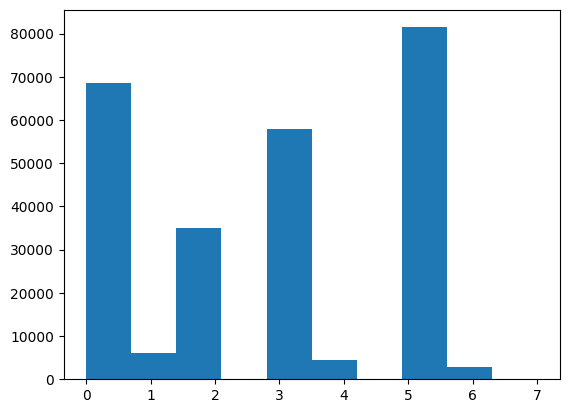

In [ ]:
# 배아 이식 경과일 분포 확인하기
plt.hist(train_df['배아 이식 경과일'],bins=10)

In [ ]:
import pandas as pd
import numpy as np

# '배아 이식 경과일' 히스토그램 데이터
hist_values, bin_edges = np.histogram(train_df['배아 이식 경과일'], bins=10)

# 누적 빈도 계산
cumulative_counts = np.cumsum(hist_values)
total_count = cumulative_counts[-1]

# 33%와 66%에 해당하는 경계값 찾기
threshold_33 = total_count * 0.33
threshold_66 = total_count * 0.66

# 33%와 66%에 해당하는 '배아 이식 경과일' 기준값 설정
label_bins = []
for i, count in enumerate(cumulative_counts):
    if count >= threshold_33 and len(label_bins) == 0:
        label_bins.append(bin_edges[i])  # 33% 경계값
    if count >= threshold_66 and len(label_bins) == 1:
        label_bins.append(bin_edges[i])  # 66% 경계값
        break

# 라벨링 함수 정의
def assign_label(value):
    if value < label_bins[0]:
        return 0  # 나쁨
    elif value < label_bins[1]:
        return 1  # 보통
    else:
        return 2  # 좋음

# 라벨링 적용
train_df['label'] = train_df['배아 이식 경과일'].apply(assign_label)

# 라벨별 개수 확인
label_counts = train_df['label'].value_counts().sort_index()
print(label_counts)


label
0    74523
1    93002
2    88826
Name: count, dtype: int64


In [ ]:
'''# datetime열 및 quality열 버리기, minmax scaling 하고, data leakage 피함

DT_train_df=train_df.drop('date_time', axis=1)
DT_train_df=train_df.drop('quality', axis=1)'''

"# datetime열 및 quality열 버리기, minmax scaling 하고, data leakage 피함\n\nDT_train_df=train_df.drop('date_time', axis=1)\nDT_train_df=train_df.drop('quality', axis=1)"

In [ ]:
import sklearn.preprocessing

scaler = sklearn.preprocessing.MinMaxScaler()

# 'label' 컬럼을 2D 배열로 변환하여 스케일링
X = scaler.fit_transform(train_df[['label']])  # DataFrame 형식으로 변환

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# 'label' 컬럼을 특성 데이터 X와 타겟 변수 label로 설정
X = train_df[['label']]  # 특성 데이터 (2D 배열 형식으로 설정)
label = train_df['label']  # 타겟 변수

# 학습 데이터와 검정 데이터 분할 (train: 70%, test: 30%)
trainx, testx, trainy, testy = train_test_split(X, label, test_size=0.3, random_state=42)

# 결과 확인
print("Train X size:", len(trainx))
print("Train Y size:", len(trainy))
print("Test X size:", len(testx))
print("Test Y size:", len(testy))

Train X size: 179445
Train Y size: 179445
Test X size: 76906
Test Y size: 76906


In [ ]:
#피처가 array 형태이므로, 타겟도 array형태로 변환
trainy = trainy.to_numpy()
testy = testy.to_numpy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

In [ ]:
# 모델 정의
model = DecisionTreeClassifier(random_state=42)

In [ ]:
# 모델 Fitting
model = model.fit(trainx,trainy)

In [ ]:
# 예측
predictions = model.predict(testx)

In [ ]:
from sklearn.metrics import accuracy_score
# 정확도 계산
accuracy = accuracy_score(testy, predictions)
print("Accuracy:", accuracy) # scaling 전후 성능 비교도 해보세요

Accuracy: 1.0


In [ ]:
# trainset에 대한 과적합
predictions = model.predict(trainx)
accuracy = accuracy_score(trainy, predictions)
print("Accuracy:", accuracy) # scaling 전후 성능 비교도 해보세요

Accuracy: 1.0


In [ ]:
# 모델 정의_maxdepth 설정(prunning)
model = DecisionTreeClassifier(random_state=42,max_depth=7,min_samples_leaf=2)
# 모델 Fitting
model = model.fit(trainx,trainy)
# 예측
predictions = model.predict(testx)
# 정확도 계산
accuracy = accuracy_score(testy, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
pred_proba = model.predict_proba(testx)[:, 1]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# NaN 값 처리
train_df['배아 이식 경과일'] = train_df['배아 이식 경과일'].fillna(train_df['배아 이식 경과일'].median())
test_df['배아 이식 경과일'] = test_df['배아 이식 경과일'].fillna(test_df['배아 이식 경과일'].median())

# '배아 이식 경과일' 히스토그램 데이터
hist_values, bin_edges = np.histogram(train_df['배아 이식 경과일'], bins=10)

# 누적 빈도 계산
cumulative_counts = np.cumsum(hist_values)
total_count = cumulative_counts[-1]

# 33%와 66%에 해당하는 경계값 찾기
threshold_33 = total_count * 0.33
threshold_66 = total_count * 0.66

# 33%와 66%에 해당하는 '배아 이식 경과일' 기준값 설정
label_bins = []
for i, count in enumerate(cumulative_counts):
    if count >= threshold_33 and len(label_bins) == 0:
        label_bins.append(bin_edges[i])  # 33% 경계값
    if count >= threshold_66 and len(label_bins) == 1:
        label_bins.append(bin_edges[i])  # 66% 경계값
        break

# 라벨링 함수 정의
def assign_label(value):
    if value < label_bins[0]:
        return 0  # 나쁨
    elif value < label_bins[1]:
        return 1  # 보통
    else:
        return 2  # 좋음

# 라벨링 적용
train_df['embryo_label'] = train_df['배아 이식 경과일'].apply(assign_label)
test_df['embryo_label'] = test_df['배아 이식 경과일'].apply(assign_label)

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate = {
    '0회': 0.290987, '1회': 0.249952, '2회': 0.236354, '3회': 0.236354,
    '4회': 0.227792, '5회': 0.215792, '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑
procedure_success_rate = {'DI': 0.128914, 'IVF': 0.261605}

# 시술 당시 나이별 성공률 매핑
age_group_success_rate = {
    '만18-34세': 0.322622, '만35-37세': 0.278401, '만38-39세': 0.217138,
    '만40-42세': 0.159393, '만43-44세': 0.118012, '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3  # 결합된 확률

# 훈련 및 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
for df in [train_df, test_df]:
    df['Age Group Success Rate'] = df['시술 당시 나이'].map(age_group_success_rate)
    df['Combined Success Rate'] = df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label']]
y_train = train_df['임신 성공 여부']

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label']]

# 예측 확률 계산
pred_proba = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_with_embryo_label.csv', index=False)

# 결과 확인
print(sample_submission.head())

           ID  probability
0  TEST_00000     0.192468
1  TEST_00001     0.194700
2  TEST_00002     0.095832
3  TEST_00003     0.120023
4  TEST_00004     0.381174


#Submission6_ 특정 시술 유형 _DT 모델에 추가

In [ ]:
success_counts_T = train_df[train_df['임신 성공 여부'] == 1]['특정 시술 유형'].value_counts()
total_counts_t = train_df['특정 시술 유형'].value_counts()
success_rates = success_counts_T.div(total_counts_t).fillna(0)
print(success_rates)

특정 시술 유형
FER                                    0.333333
GIFT                                   0.000000
Generic DI                             0.169014
ICI                                    0.135417
ICSI                                   0.272825
ICSI / AH                              0.217165
ICSI / AH:Unknown                      0.500000
ICSI / BLASTOCYST                      0.356743
ICSI / BLASTOCYST :ICSI                1.000000
ICSI / BLASTOCYST :IVF / BLASTOCYST    0.250000
ICSI / BLASTOCYST:IVF / BLASTOCYST     0.333333
ICSI:ICSI                              0.009939
ICSI:IVF                               0.234822
ICSI:Unknown                           0.101449
IUI                                    0.128525
IVF                                    0.261457
IVF / AH                               0.184953
IVF / AH:ICSI / AH                     0.000000
IVF / BLASTOCYST                       0.366186
IVF:ICSI                               0.283163
IVF:IVF                        

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate ={
    '0회': 0.290987,
    '1회': 0.249952,
    '2회': 0.236354,
    '3회': 0.236354,
    '4회': 0.227792,
    '5회': 0.215792,
    '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑 (새로운 데이터로 업데이트)
procedure_success_rate = {
    'FER': 0.333333,
    'GIFT': 0.000000,
    'Generic DI': 0.169014,
    'ICI': 0.135417,
    'ICSI': 0.272825,
    'ICSI / AH': 0.217165,
    'ICSI / AH:Unknown': 0.500000,
    'ICSI / BLASTOCYST': 0.356743,
    'ICSI / BLASTOCYST :ICSI': 1.000000,
    'ICSI / BLASTOCYST :IVF / BLASTOCYST': 0.250000,
    'ICSI / BLASTOCYST:IVF / BLASTOCYST': 0.333333,
    'ICSI:ICSI': 0.009939,
    'ICSI:IVF': 0.234822,
    'ICSI:Unknown': 0.101449,
    'IUI': 0.128525,
    'IVF': 0.261457,
    'IVF / AH': 0.184953,
    'IVF / AH:ICSI / AH': 0.000000,
    'IVF / BLASTOCYST': 0.366186,
    'IVF:ICSI': 0.283163,
    'IVF:IVF': 0.010471,
    'IVF:Unknown': 0.170000,
    'IVI': 0.086957,
    'Unknown': 0.237203,
    '없음': 0.000000
}

# 시술 당시 나이별 성공률 매핑 (train에서 사용했던 방식)
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3  # 결합된 확률

# 훈련 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련 (ExtraTreesClassifier 사용)
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산 (class 1에 대한 확률만 추출)
pred_proba = model.predict_proba(X_test)[:, 1]

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_0220_DT.csv', index=False)

# 결과 확인
print(sample_submission.head())

           ID  probability
0  TEST_00000     0.268469
1  TEST_00001     0.340859
2  TEST_00002     0.167135
3  TEST_00003     0.167135
4  TEST_00004     0.268469


#SUB_DT1

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate ={
    '0회': 0.290987,
    '1회': 0.249952,
    '2회': 0.236354,
    '3회': 0.236354,
    '4회': 0.227792,
    '5회': 0.215792,
    '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑 (train에서 사용했던 방식)
procedure_success_rate = {
    'DI': 0.128914,
    'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑 (train에서 사용했던 방식)
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3  # 결합된 확률

# 훈련 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련 (ExtraTreesClassifier 사용)
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산 (class 1에 대한 확률만 추출)
pred_proba = model.predict_proba(X_test)[:, 1]

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_DT1.csv', index=False)

# 결과 확인
print(sample_submission.head())

           ID  probability
0  TEST_00000     0.268469
1  TEST_00001     0.340859
2  TEST_00002     0.167135
3  TEST_00003     0.167135
4  TEST_00004     0.268469


#SUB_DT_더

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([7.9391e+04, 4.5462e+04, 5.8334e+04, 3.0493e+04, 1.9386e+04,
        1.3161e+04, 4.8100e+03, 3.0730e+03, 1.0520e+03, 5.3900e+02,
        3.8600e+02, 1.3000e+02, 6.5000e+01, 2.7000e+01, 4.2000e+01]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ,
        37.4, 40.8, 44.2, 47.6, 51. ]),
 <BarContainer object of 15 artists>)

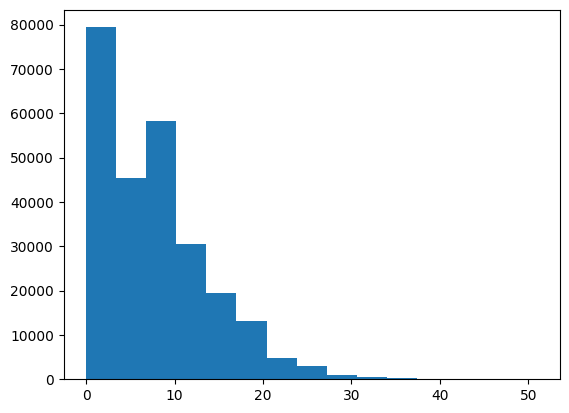

In [ ]:
# 혼합된 난자 수 분포 확인하기
plt.hist(train_df['혼합된 난자 수'],bins=15)

In [ ]:
#----4Q 분류

import pandas as pd
import numpy as np

# '혼합된 난자 수' 히스토그램 데이터
hist_values, bin_edges = np.histogram(train_df['혼합된 난자 수'], bins=15)

# 누적 빈도 계산
cumulative_counts = np.cumsum(hist_values)
total_count = cumulative_counts[-1]

# 25%와 50% 75%에 해당하는 경계값 찾기
threshold_25 = total_count * 0.25
threshold_50 = total_count * 0.50
threshold_75 = total_count * 0.75

# 25%와 50% 75%에 해당하는 '혼합된 난자 수' 기준값 설정
label_bins = []
for i, count in enumerate(cumulative_counts):
    if count >= threshold_25 and len(label_bins) == 0:
        label_bins.append(bin_edges[i])  # 25% 경계값
    if count >= threshold_50 and len(label_bins) == 1:
        label_bins.append(bin_edges[i])  # 50% 경계값
    if count >= threshold_75 and len(label_bins) == 2:
        label_bins.append(bin_edges[i])  # 75% 경계값
        break

# 라벨링 함수 정의
def assign_label2(value):
    if value < label_bins[0]:
        return 0  # 나쁨
    elif value < label_bins[1]:
        return 1  # 보통
    elif value < label_bins[2]:
        return 2  # 좋음
    else:
        return 3  # 최상

# 라벨링 적용
train_df['label2'] = train_df['혼합된 난자 수'].apply(assign_label)

# 라벨별 개수 확인
label_counts2 = train_df['label2'].value_counts().sort_index()
print(label_counts2)

label2
1    124853
2    131498
Name: count, dtype: int64


In [ ]:
import sklearn.preprocessing

scaler = sklearn.preprocessing.MinMaxScaler()

# 'label' 컬럼을 2D 배열로 변환하여 스케일링
X = scaler.fit_transform(train_df[['label2']])  # DataFrame 형식으로 변환

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# 'label' 컬럼을 특성 데이터 X와 타겟 변수 label로 설정
X = train_df[['label2']]  # 특성 데이터 (2D 배열 형식으로 설정)
label2 = train_df['label2']  # 타겟 변수

# 학습 데이터와 검정 데이터 분할 (train: 70%, test: 30%)
trainx, testx, trainy, testy = train_test_split(X, label2, test_size=0.3, random_state=42)

# 결과 확인
print("Train X size:", len(trainx))
print("Train Y size:", len(trainy))
print("Test X size:", len(testx))
print("Test Y size:", len(testy))

Train X size: 179445
Train Y size: 179445
Test X size: 76906
Test Y size: 76906


In [ ]:
#피처가 array 형태이므로, 타겟도 array형태로 변환
trainy = trainy.to_numpy()
testy = testy.to_numpy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

In [ ]:
# 모델 정의
model = DecisionTreeClassifier(random_state=42)

In [ ]:
# 모델 Fitting
model = model.fit(trainx,trainy)

In [ ]:
# 예측
predictions = model.predict(testx)

In [ ]:
from sklearn.metrics import accuracy_score
# 정확도 계산
accuracy = accuracy_score(testy, predictions)
print("Accuracy:", accuracy) # scaling 전후 성능 비교도 해보세요

Accuracy: 1.0


In [ ]:
# trainset에 대한 과적합
predictions = model.predict(trainx)
accuracy = accuracy_score(trainy, predictions)
print("Accuracy:", accuracy) # scaling 전후 성능 비교도 해보세요

Accuracy: 1.0


In [ ]:
# 모델 정의_maxdepth 설정(prunning)
model = DecisionTreeClassifier(random_state=42,max_depth=7,min_samples_leaf=2)
# 모델 Fitting
model = model.fit(trainx,trainy)
# 예측
predictions = model.predict(testx)
# 정확도 계산
accuracy = accuracy_score(testy, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
pred_proba = model.predict_proba(testx)[:, 1]

In [ ]:
#새로운 DT 통합 방식 사용

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# NaN 값 처리 및 데이터 타입 변환
for df in [train_df, test_df]:
    df['배아 이식 경과일'] = pd.to_numeric(df['배아 이식 경과일'], errors='coerce')
    df['혼합된 난자 수'] = pd.to_numeric(df['혼합된 난자 수'], errors='coerce')
    df['배아 이식 경과일'] = df['배아 이식 경과일'].fillna(df['배아 이식 경과일'].median())
    df['혼합된 난자 수'] = df['혼합된 난자 수'].fillna(df['혼합된 난자 수'].median())

# '배아 이식 경과일' 라벨링
embryo_label_bins = train_df['배아 이식 경과일'].quantile([0.33, 0.66])

def assign_embryo_label(value):
    if value < embryo_label_bins.iloc[0]:
        return 0  # 나쁨
    elif value < embryo_label_bins.iloc[1]:
        return 1  # 보통
    else:
        return 2  # 좋음

train_df['embryo_label'] = train_df['배아 이식 경과일'].apply(assign_embryo_label)
test_df['embryo_label'] = test_df['배아 이식 경과일'].apply(assign_embryo_label)

# '혼합된 난자 수' 라벨링
egg_label_bins = train_df['혼합된 난자 수'].quantile([0.25, 0.5, 0.75])

def assign_egg_label(value):
    if value < egg_label_bins.iloc[0]:
        return 0  # 나쁨
    elif value < egg_label_bins.iloc[1]:
        return 1  # 보통
    elif value < egg_label_bins.iloc[2]:
        return 2  # 좋음
    else:
        return 3  # 최상

train_df['egg_label'] = train_df['혼합된 난자 수'].apply(assign_egg_label)
test_df['egg_label'] = test_df['혼합된 난자 수'].apply(assign_egg_label)

# 기존 성공률 매핑
all_counted_success_rate = {
    '0회': 0.290987, '1회': 0.249952, '2회': 0.236354, '3회': 0.236354,
    '4회': 0.227792, '5회': 0.215792, '6회 이상': 0.203300
}

procedure_success_rate = {'DI': 0.128914, 'IVF': 0.261605}

age_group_success_rate = {
    '만18-34세': 0.322622, '만35-37세': 0.278401, '만38-39세': 0.217138,
    '만40-42세': 0.159393, '만43-44세': 0.118012, '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3

for df in [train_df, test_df]:
    df['Age Group Success Rate'] = df['시술 당시 나이'].map(age_group_success_rate)
    df['Combined Success Rate'] = df.apply(combine_success_rate, axis=1)

# 훈련 데이터 준비
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label', 'egg_label']]
y_train = train_df['임신 성공 여부']

# Random Forest 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("교차 검증 점수:", cv_scores)
print("평균 교차 검증 점수:", cv_scores.mean())

# 테스트 데이터 준비 및 예측
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label', 'egg_label']]
pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 결과 저장
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')
sample_submission['probability'] = pred_proba
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_random_forest.csv', index=False)

print(sample_submission.head())

교차 검증 점수: [0.74156931 0.74158377 0.7417008  0.74154476 0.74150575]
평균 교차 검증 점수: 0.7415808793863539
           ID  probability
0  TEST_00000     0.246916
1  TEST_00001     0.066918
2  TEST_00002     0.128427
3  TEST_00003     0.100920
4  TEST_00004     0.386946


In [ ]:
#DT 만
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# NaN 값 처리 및 데이터 타입 변환
for df in [train_df, test_df]:
    df['배아 이식 경과일'] = pd.to_numeric(df['배아 이식 경과일'], errors='coerce')
    df['혼합된 난자 수'] = pd.to_numeric(df['혼합된 난자 수'], errors='coerce')
    df['배아 이식 경과일'] = df['배아 이식 경과일'].fillna(df['배아 이식 경과일'].median())
    df['혼합된 난자 수'] = df['혼합된 난자 수'].fillna(df['혼합된 난자 수'].median())

# '배아 이식 경과일' 라벨링
embryo_label_bins = train_df['배아 이식 경과일'].quantile([0.33, 0.66])

def assign_embryo_label(value):
    if value < embryo_label_bins.iloc[0]:
        return 0  # 나쁨
    elif value < embryo_label_bins.iloc[1]:
        return 1  # 보통
    else:
        return 2  # 좋음

train_df['embryo_label'] = train_df['배아 이식 경과일'].apply(assign_embryo_label)
test_df['embryo_label'] = test_df['배아 이식 경과일'].apply(assign_embryo_label)

# '혼합된 난자 수' 라벨링
egg_label_bins = train_df['혼합된 난자 수'].quantile([0.25, 0.5, 0.75])

def assign_egg_label(value):
    if value < egg_label_bins.iloc[0]:
        return 0  # 나쁨
    elif value < egg_label_bins.iloc[1]:
        return 1  # 보통
    elif value < egg_label_bins.iloc[2]:
        return 2  # 좋음
    else:
        return 3  # 최상

train_df['egg_label'] = train_df['혼합된 난자 수'].apply(assign_egg_label)
test_df['egg_label'] = test_df['혼합된 난자 수'].apply(assign_egg_label)

# 훈련 데이터 준비
X_train = train_df[['embryo_label', 'egg_label']]
y_train = train_df['임신 성공 여부']

# Random Forest 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("교차 검증 점수:", cv_scores)
print("평균 교차 검증 점수:", cv_scores.mean())

# 테스트 데이터 준비 및 예측
X_test = test_df[['embryo_label', 'egg_label']]
pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 결과 저장
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')
sample_submission['probability'] = pred_proba
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_random_forest_DT_only.csv', index=False)

print(sample_submission.head())

교차 검증 점수: [0.74164732 0.74166179 0.74166179 0.74164229 0.74164229]
평균 교차 검증 점수: 0.7416510955828945
           ID  probability
0  TEST_00000     0.199700
1  TEST_00001     0.050119
2  TEST_00002     0.199700
3  TEST_00003     0.220853
4  TEST_00004     0.389090


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# NaN 값 처리 및 데이터 타입 변환
for df in [train_df, test_df]:
    df['배아 이식 경과일'] = pd.to_numeric(df['배아 이식 경과일'], errors='coerce')
    df['혼합된 난자 수'] = pd.to_numeric(df['혼합된 난자 수'], errors='coerce')
    df['배아 이식 경과일'] = df['배아 이식 경과일'].fillna(df['배아 이식 경과일'].median())
    df['혼합된 난자 수'] = df['혼합된 난자 수'].fillna(df['혼합된 난자 수'].median())

# '배아 이식 경과일' 히스토그램 데이터
hist_values, bin_edges = np.histogram(train_df['배아 이식 경과일'].dropna(), bins=10)

# 누적 빈도 계산
cumulative_counts = np.cumsum(hist_values)
total_count = cumulative_counts[-1]

# 33%와 66%에 해당하는 경계값 찾기
threshold_33 = total_count * 0.33
threshold_66 = total_count * 0.66

# 33%와 66%에 해당하는 '배아 이식 경과일' 기준값 설정
embryo_label_bins = []
for i, count in enumerate(cumulative_counts):
    if count >= threshold_33 and len(embryo_label_bins) == 0:
        embryo_label_bins.append(bin_edges[i])  # 33% 경계값
    if count >= threshold_66 and len(embryo_label_bins) == 1:
        embryo_label_bins.append(bin_edges[i])  # 66% 경계값
        break

# '배아 이식 경과일' 라벨링 함수 정의
def assign_embryo_label(value):
    if value < embryo_label_bins[0]:
        return 0  # 나쁨
    elif value < embryo_label_bins[1]:
        return 1  # 보통
    else:
        return 2  # 좋음

# '배아 이식 경과일' 라벨링 적용
train_df['embryo_label'] = train_df['배아 이식 경과일'].apply(assign_embryo_label)
test_df['embryo_label'] = test_df['배아 이식 경과일'].apply(assign_embryo_label)

# '혼합된 난자 수' 히스토그램 데이터
hist_values, bin_edges = np.histogram(train_df['혼합된 난자 수'].dropna(), bins=15)

# 누적 빈도 계산
cumulative_counts = np.cumsum(hist_values)
total_count = cumulative_counts[-1]

# 25%, 50%, 75%에 해당하는 경계값 찾기
threshold_25 = total_count * 0.25
threshold_50 = total_count * 0.50
threshold_75 = total_count * 0.75

# 25%, 50%, 75%에 해당하는 '혼합된 난자 수' 기준값 설정
egg_label_bins = []
for i, count in enumerate(cumulative_counts):
    if count >= threshold_25 and len(egg_label_bins) == 0:
        egg_label_bins.append(bin_edges[i])  # 25% 경계값
    if count >= threshold_50 and len(egg_label_bins) == 1:
        egg_label_bins.append(bin_edges[i])  # 50% 경계값
    if count >= threshold_75 and len(egg_label_bins) == 2:
        egg_label_bins.append(bin_edges[i])  # 75% 경계값
        break

# '혼합된 난자 수' 라벨링 함수 정의
def assign_egg_label(value):
    if value < egg_label_bins[0]:
        return 0  # 나쁨
    elif value < egg_label_bins[1]:
        return 1  # 보통
    elif value < egg_label_bins[2]:
        return 2  # 좋음
    else:
        return 3  # 최상

# '혼합된 난자 수' 라벨링 적용
train_df['egg_label'] = train_df['혼합된 난자 수'].apply(assign_egg_label)
test_df['egg_label'] = test_df['혼합된 난자 수'].apply(assign_egg_label)

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate = {
    '0회': 0.290987, '1회': 0.249952, '2회': 0.236354, '3회': 0.236354,
    '4회': 0.227792, '5회': 0.215792, '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑
procedure_success_rate = {'DI': 0.128914, 'IVF': 0.261605}

# 시술 당시 나이별 성공률 매핑
age_group_success_rate = {
    '만18-34세': 0.322622, '만35-37세': 0.278401, '만38-39세': 0.217138,
    '만40-42세': 0.159393, '만43-44세': 0.118012, '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3  # 결합된 확률

# 훈련 및 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
for df in [train_df, test_df]:
    df['Age Group Success Rate'] = df['시술 당시 나이'].map(age_group_success_rate)
    df['Combined Success Rate'] = df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label', 'egg_label']]
y_train = train_df['임신 성공 여부']

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label', 'egg_label']]

# 예측 확률 계산
pred_proba = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_with_embryo_and_egg_labels.csv', index=False)

# 결과 확인
print(sample_submission.head())


           ID  probability
0  TEST_00000     0.246508
1  TEST_00001     0.187252
2  TEST_00002     0.128689
3  TEST_00003     0.115323
4  TEST_00004     0.386831


#SBU_DT_IMPORVED

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate ={
    '0회': 0.290987,
    '1회': 0.249952,
    '2회': 0.236354,
    '3회': 0.236354,
    '4회': 0.227792,
    '5회': 0.215792,
    '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑
procedure_success_rate = {
    'DI': 0.128914,
    'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3

# 훈련 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# 훈련 및 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
for df in [train_df, test_df]:
    df['Age Group Success Rate'] = df['시술 당시 나이'].map(age_group_success_rate)
    df['Combined Success Rate'] = df.apply(combine_success_rate, axis=1)

# 범주형 변수 인코딩
le = LabelEncoder()
categorical_cols = ['시술 유형', '시술 당시 나이', '총 시술 횟수']
for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# 사용할 특성 선택
features = ['시술 유형', '시술 당시 나이', '총 시술 횟수', 'Age Group Success Rate', 'Combined Success Rate']

X_train = train_df[features]
y_train = train_df['임신 성공 여부']

# 특성 중요도를 기반으로 특성 선택
selector = SelectFromModel(ExtraTreesClassifier(n_estimators=100, random_state=42), prefit=False)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()].tolist()

X_train = X_train[selected_features]
X_test = test_df[selected_features]

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 정의
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV를 사용한 하이퍼파라미터 튜닝
model = ExtraTreesClassifier(random_state=42)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# 최적의 모델 선택
best_model = random_search.best_estimator_

# 교차 검증을 통한 모델 평가
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

# 최종 모델 훈련
best_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
pred_proba = best_model.predict_proba(X_test)[:, 1]

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_improved.csv', index=False)

# 결과 확인
print(sample_submission.head())


KeyboardInterrupt: 

#-------NEW 수집된 신선 난자 수

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([113714.,  75037.,  48244.,  13454.,   4042.,   1412.,    289.,
           159.]),
 array([ 0.   ,  6.375, 12.75 , 19.125, 25.5  , 31.875, 38.25 , 44.625,
        51.   ]),
 <BarContainer object of 8 artists>)

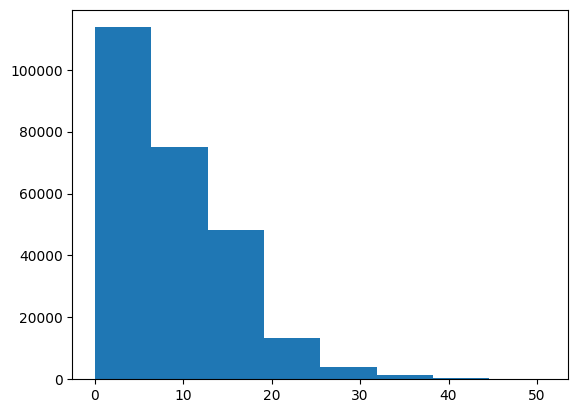

In [ ]:
# 혼합된 난자 수 분포 확인하기
plt.hist(train_df['수집된 신선 난자 수'],bins=8)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 수정된 라벨링 함수
def assign_label4(value):
    if value == 0:
        return 0  # 0값 별도 처리
    elif value <= 5:  # 예시 값, 실제 데이터에 맞게 조정 필요
        return 1
    elif value <= 9:  # 예시 값, 실제 데이터에 맞게 조정 필요
        return 2
    elif value <= 13:  # 예시 값, 실제 데이터에 맞게 조정 필요
        return 3
    else:
        return 4

# 라벨링 적용
train_df['label4'] = train_df['수집된 신선 난자 수'].apply(assign_label4)

# 라벨별 개수 확인
label_counts4 = train_df['label4'].value_counts().sort_index()
print(label_counts4)

label4
0    60136
1    40960
2    51976
3    45563
4    57716
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# NaN 값 처리 및 데이터 타입 변환
for df in [train_df, test_df]:
    df['배아 이식 경과일'] = pd.to_numeric(df['배아 이식 경과일'], errors='coerce')
    df['수집된 신선 난자 수'] = pd.to_numeric(df['수집된 신선 난자 수'], errors='coerce')
    df['배아 이식 경과일'] = df['배아 이식 경과일'].fillna(df['배아 이식 경과일'].median())
    df['수집된 신선 난자 수'] = df['수집된 신선 난자 수'].fillna(df['수집된 신선 난자 수'].median())

# '배아 이식 경과일' 라벨링
embryo_label_bins = train_df['배아 이식 경과일'].quantile([0.33, 0.66])

def assign_embryo_label(value):
    if value < embryo_label_bins.iloc[0]:
        return 0  # 나쁨
    elif value < embryo_label_bins.iloc[1]:
        return 1  # 보통
    else:
        return 2  # 좋음

train_df['embryo_label'] = train_df['배아 이식 경과일'].apply(assign_embryo_label)
test_df['embryo_label'] = test_df['배아 이식 경과일'].apply(assign_embryo_label)

# '수집된 신선 난자 수' 라벨링 (새로운 방식)
def assign_egg_label(value):
    if value == 0:
        return 0
    elif value <= 5:
        return 1
    elif value <= 9:
        return 2
    elif value <= 13:
        return 3
    else:
        return 4

train_df['egg_label'] = train_df['수집된 신선 난자 수'].apply(assign_egg_label)
test_df['egg_label'] = test_df['수집된 신선 난자 수'].apply(assign_egg_label)

# 기존 성공률 매핑
all_counted_success_rate = {
    '0회': 0.290987, '1회': 0.249952, '2회': 0.236354, '3회': 0.236354,
    '4회': 0.227792, '5회': 0.215792, '6회 이상': 0.203300
}

procedure_success_rate = {'DI': 0.128914, 'IVF': 0.261605}

age_group_success_rate = {
    '만18-34세': 0.322622, '만35-37세': 0.278401, '만38-39세': 0.217138,
    '만40-42세': 0.159393, '만43-44세': 0.118012, '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3

for df in [train_df, test_df]:
    df['Age Group Success Rate'] = df['시술 당시 나이'].map(age_group_success_rate)
    df['Combined Success Rate'] = df.apply(combine_success_rate, axis=1)

# 훈련 데이터 준비
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label', 'egg_label']]
y_train = train_df['임신 성공 여부']

# Random Forest 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("교차 검증 점수:", cv_scores)
print("평균 교차 검증 점수:", cv_scores.mean())

# 테스트 데이터 준비 및 예측
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label', 'egg_label']]
pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 결과 저장
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')
sample_submission['probability'] = pred_proba
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_NEW_DT.csv', index=False)

print(sample_submission.head())

교차 검증 점수: [0.7415303  0.74164229 0.74094012 0.74138873 0.74154476]
평균 교차 검증 점수: 0.7414092392030435
           ID  probability
0  TEST_00000     0.238138
1  TEST_00001     0.175985
2  TEST_00002     0.107431
3  TEST_00003     0.097878
4  TEST_00004     0.363934


In [ ]:
#이게 찐임================================


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# NaN 값 처리 및 데이터 타입 변환
for df in [train_df, test_df]:
    df['배아 이식 경과일'] = pd.to_numeric(df['배아 이식 경과일'], errors='coerce')
    df['혼합된 난자 수'] = pd.to_numeric(df['혼합된 난자 수'], errors='coerce')
    df['수집된 신선 난자 수'] = pd.to_numeric(df['수집된 신선 난자 수'], errors='coerce')
    df['배아 이식 경과일'] = df['배아 이식 경과일'].fillna(df['배아 이식 경과일'].median())
    df['혼합된 난자 수'] = df['혼합된 난자 수'].fillna(df['혼합된 난자 수'].median())
    df['수집된 신선 난자 수'] = df['수집된 신선 난자 수'].fillna(df['수집된 신선 난자 수'].median())

# 기존 라벨링 유지
embryo_label_bins = train_df['배아 이식 경과일'].quantile([0.33, 0.66])
egg_label_bins = train_df['혼합된 난자 수'].quantile([0.25, 0.5, 0.75])

def assign_embryo_label(value):
    if value < embryo_label_bins.iloc[0]:
        return 0  # 나쁨
    elif value < embryo_label_bins.iloc[1]:
        return 1  # 보통
    else:
        return 2  # 좋음

def assign_egg_label(value):
    if value < egg_label_bins.iloc[0]:
        return 0  # 나쁨
    elif value < egg_label_bins.iloc[1]:
        return 1  # 보통
    elif value < egg_label_bins.iloc[2]:
        return 2  # 좋음
    else:
        return 3  # 최상

# 새로운 라벨링 추가
def assign_fresh_egg_label(value):
    if value == 0:
        return 0
    elif value <= 5:
        return 1
    elif value <= 9:
        return 2
    elif value <= 13:
        return 3
    else:
        return 4

for df in [train_df, test_df]:
    df['embryo_label'] = df['배아 이식 경과일'].apply(assign_embryo_label)
    df['egg_label'] = df['혼합된 난자 수'].apply(assign_egg_label)
    df['fresh_egg_label'] = df['수집된 신선 난자 수'].apply(assign_fresh_egg_label)

# 기존 코드 유지
all_counted_success_rate = {
    '0회': 0.290987, '1회': 0.249952, '2회': 0.236354, '3회': 0.236354,
    '4회': 0.227792, '5회': 0.215792, '6회 이상': 0.203300
}

procedure_success_rate = {'DI': 0.128914, 'IVF': 0.261605}

age_group_success_rate = {
    '만18-34세': 0.322622, '만35-37세': 0.278401, '만38-39세': 0.217138,
    '만40-42세': 0.159393, '만43-44세': 0.118012, '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3

for df in [train_df, test_df]:
    df['Age Group Success Rate'] = df['시술 당시 나이'].map(age_group_success_rate)
    df['Combined Success Rate'] = df.apply(combine_success_rate, axis=1)

# 훈련 데이터 준비 (새로운 특성 추가)
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label', 'egg_label', 'fresh_egg_label']]
y_train = train_df['임신 성공 여부']

# Random Forest 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("교차 검증 점수:", cv_scores)
print("평균 교차 검증 점수:", cv_scores.mean())

# 테스트 데이터 준비 및 예측 (새로운 특성 추가)
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate', 'embryo_label', 'egg_label', 'fresh_egg_label']]
pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 결과 저장
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')
sample_submission['probability'] = pred_proba
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_newNEW.csv', index=False)

print(sample_submission.head())


교차 검증 점수: [0.74045757 0.74062805 0.740433   0.7408621  0.74053052]
평균 교차 검증 점수: 0.7405822490440077
           ID  probability
0  TEST_00000     0.261136
1  TEST_00001     0.101939
2  TEST_00002     0.119975
3  TEST_00003     0.084207
4  TEST_00004     0.377246


#--

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate ={
    '0회': 0.290987,
    '1회': 0.249952,
    '2회': 0.236354,
    '3회': 0.236354,
    '4회': 0.227792,
    '5회': 0.215792,
    '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑 (train에서 사용했던 방식)
procedure_success_rate = {
    'DI': 0.128914,
    'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑 (train에서 사용했던 방식)
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3  # 결합된 확률

# 훈련 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/train.csv')

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련 (ExtraTreesClassifier 사용)
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산 (class 1에 대한 확률만 추출)
pred_proba_test = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_DT1.csv', index=False)

# 결과 확인
print(sample_submission.head())

           ID  probability
0  TEST_00000     0.268469
1  TEST_00001     0.340859
2  TEST_00002     0.167135
3  TEST_00003     0.167135
4  TEST_00004     0.268469


In [ ]:
#-----------------사용하지 않음--------------------

# '배아 이식 경과일' 컬럼에서 NaN 값을 제외한 데이터로 히스토그램 계산
train_df_cleaned = train_df['배아 이식 경과일'].dropna()

# '배아 이식 경과일' 히스토그램 데이터
hist_values, bin_edges = np.histogram(train_df_cleaned, bins=10)

# 누적 빈도 계산
cumulative_counts = np.cumsum(hist_values)
total_count = cumulative_counts[-1]

# 33%와 66%에 해당하는 경계값 찾기
threshold_33 = total_count * 0.33
threshold_66 = total_count * 0.66

# 33%와 66%에 해당하는 '배아 이식 경과일' 기준값 설정
label_bins = []
for i, count in enumerate(cumulative_counts):
    if count >= threshold_33 and len(label_bins) == 0:
        label_bins.append(bin_edges[i])  # 33% 경계값
    if count >= threshold_66 and len(label_bins) == 1:
        label_bins.append(bin_edges[i])  # 66% 경계값
        break

# 라벨링 함수 정의
def assign_label(value):
    if value < label_bins[0]:
        return 0  # 나쁨
    elif value < label_bins[1]:
        return 1  # 보통
    else:
        return 2  # 좋음

# 라벨링 적용
train_df['label'] = train_df['배아 이식 경과일'].apply(assign_label)

# 총 시술 횟수별 성공률 매핑
all_counted_success_rate = {
    '0회': 0.290987,
    '1회': 0.249952,
    '2회': 0.236354,
    '3회': 0.236354,
    '4회': 0.227792,
    '5회': 0.215792,
    '6회 이상': 0.203300
}

# 시술 유형별 성공률 매핑
procedure_success_rate = {
    'DI': 0.128914,
    'IVF': 0.261605
}

# 시술 당시 나이별 성공률 매핑
age_group_success_rate = {
    '만18-34세': 0.322622,
    '만35-37세': 0.278401,
    '만38-39세': 0.217138,
    '만40-42세': 0.159393,
    '만43-44세': 0.118012,
    '만45-50세': 0.167679,
    '알 수 없음': 0.000000
}

# 시술 유형과 나이에 따른 성공 확률을 결합하여 새로운 피처 'Combined Success Rate' 생성
def combine_success_rate(row):
    all_counted_success = all_counted_success_rate.get(row['총 시술 횟수'], 0)
    procedure_success = procedure_success_rate.get(row['시술 유형'], 0)
    age_success = age_group_success_rate.get(row['시술 당시 나이'], 0)
    return (all_counted_success + procedure_success + age_success) / 3  # 결합된 확률

# 훈련 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
train_df['Age Group Success Rate'] = train_df['시술 당시 나이'].map(age_group_success_rate)
train_df['Combined Success Rate'] = train_df.apply(combine_success_rate, axis=1)

# 훈련 데이터에서 사용할 피처들 설정
X_train = train_df[['Age Group Success Rate', 'Combined Success Rate']]  # 두 피처 모두 포함
y_train = train_df['임신 성공 여부']  # 타겟

# 모델 훈련
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 로드
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/test.csv')

# 테스트 데이터에 'Age Group Success Rate'와 'Combined Success Rate' 추가
test_df['Age Group Success Rate'] = test_df['시술 당시 나이'].map(age_group_success_rate)
test_df['Combined Success Rate'] = test_df.apply(combine_success_rate, axis=1)

# 테스트 데이터에서 예측에 사용할 피처 설정
X_test = test_df[['Age Group Success Rate', 'Combined Success Rate']]  # 훈련과 동일한 피처 사용

# 예측 확률 계산
pred_proba_test = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 확률만 추출

# sample_submission 파일 불러오기
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')

# 예측 확률을 'probability' 컬럼에 추가
sample_submission['probability'] = pred_proba_test

# 결과를 CSV 파일로 저장
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/제출파일/submission_DT.csv', index=False)

# 결과 확인
print(sample_submission.head())

# 베이즈 이론 활용

In [ ]:
train_df['특정 시술 유형'].unique()

array(['ICSI', 'IVF', 'Unknown', 'IUI', 'IVF:IVF', 'IVF / BLASTOCYST',
       'ICSI:IVF', 'ICSI / AH', 'ICSI:ICSI', 'IVF:ICSI',
       'ICSI / BLASTOCYST ', 'IVF:Unknown', 'ICSI:Unknown', 'IVF / AH',
       'IVI', 'Generic DI', 'ICSI / BLASTOCYST :IVF / BLASTOCYST', 'ICI',
       'IVF / AH:ICSI / AH', '없음', 'GIFT',
       'ICSI / BLASTOCYST:IVF / BLASTOCYST', 'ICSI / AH:Unknown', 'FER',
       'ICSI / BLASTOCYST :ICSI'], dtype=object)

In [ ]:
success_counts_T = train_df[train_df['임신 성공 여부'] == 1]['특정 시술 유형'].value_counts()
total_counts_t = train_df['특정 시술 유형'].value_counts()
success_rates = success_counts_T.div(total_counts_t).fillna(0)
print(success_rates)

특정 시술 유형
FER                                    0.333333
GIFT                                   0.000000
Generic DI                             0.169014
ICI                                    0.135417
ICSI                                   0.272825
ICSI / AH                              0.217165
ICSI / AH:Unknown                      0.500000
ICSI / BLASTOCYST                      0.356743
ICSI / BLASTOCYST :ICSI                1.000000
ICSI / BLASTOCYST :IVF / BLASTOCYST    0.250000
ICSI / BLASTOCYST:IVF / BLASTOCYST     0.333333
ICSI:ICSI                              0.009939
ICSI:IVF                               0.234822
ICSI:Unknown                           0.101449
IUI                                    0.128525
IVF                                    0.261457
IVF / AH                               0.184953
IVF / AH:ICSI / AH                     0.000000
IVF / BLASTOCYST                       0.366186
IVF:ICSI                               0.283163
IVF:IVF                        

In [ ]:
# 사전확률 계산

# 남자인 데이터 수
n_male = data['Gender'][data['Gender'] == 'male'].count()
# 여자인 데이터 수
n_female = data['Gender'][data['Gender'] == 'female'].count()
# 전체 데이터 수
n_human = data['Gender'].count()

print("남자 데이터 수: ", n_male)
print("여자 데이터 수: ",n_female)
print("남자와 여자 데이터 수: ",n_human)

# 남자일 확률
p_male = n_male/n_human
# 여자일 확률
p_female = n_female/n_human
print("남자일 사전 확률: ",p_male)
print("여자일 사전 확률: ",p_female)

In [ ]:
# male 데이터들에 대해서만 feature별 평균
male_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
male_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
male_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# male 데이터들에 대해서만 feature별 분산
male_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
male_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
male_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

# female 데이터들에 대해서만 feature별 평균
female_height_mean = data_means['Height'][data_variance.index == 'female'].values[0]
female_weight_mean = data_means['Weight'][data_variance.index == 'female'].values[0]
female_footsize_mean = data_means['Foot_Size'][data_variance.index == 'female'].values[0]

# female 데이터들에 대해서만 feature별 분산
female_height_variance = data_variance['Height'][data_variance.index == 'female'].values[0]
female_weight_variance = data_variance['Weight'][data_variance.index == 'female'].values[0]
female_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'female'].values[0]

In [ ]:
def p_x_given_y(x, mean_y, variance_y):
    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    # return p
    return p

In [ ]:
# 데이터가 남자인 사후 확률
p1 = (p_male * p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) *
  p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance))
p1

In [ ]:
# 데이터가 여자인 사후 확률
p2= (p_female * p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) *
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance))
p2

#모델 학습

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 피처 설정: 'Age Group Success Rate' 외에도 필요한 다른 피처들 포함
X = train_df[['Age Group Success Rate']]  # 예시로 '기타_피처들'을 넣었으니 필요에 맞게 수정
y = train_df['임신 성공 여부']

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (선형 회귀 모델에 좋음)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.18618926434207891
R² Score: 0.022474280159800686


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 로지스틱 회귀 모델 학습
model_logistic = LogisticRegression()
model_logistic.fit(X_train_scaled, y_train)

# 예측
y_pred_logistic = model_logistic.predict(X_test_scaled)

# 정확도 및 혼동 행렬
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7439878293772308
Confusion Matrix:
 [[38145     0]
 [13126     0]]


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. 훈련 데이터에 대해서 스케일링 (fit + transform)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 2. 검증 데이터와 테스트 데이터에 대해서는 transform만 적용
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 3. 모델 학습
model_logistic = LogisticRegression(class_weight='balanced')
model_logistic.fit(X_train_scaled, y_train)

# 4. 검증 데이터로 평가
y_pred_val = model_logistic.predict(X_val_scaled)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# 5. 최종 평가를 위해 test data 사용
y_pred_test = model_logistic.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)


Validation Accuracy: 0.49628444929882387
Test Accuracy: 0.49628444929882387


#숨겨두기

In [ ]:
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

In [ ]:
# 카테고리형 컬럼들을 문자열로 변환
for col in categorical_columns:
    X[col] = X[col].astype(str)
    test_df[col] = test_df[col].astype(str)
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_encoded = X.copy()
X_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

X_test_encoded = test_df.copy()
X_test_encoded[categorical_columns] = ordinal_encoder.transform(test_df[categorical_columns])

numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]
X_train_encoded[numeric_columns] = X_train_encoded[numeric_columns].fillna(0)
X_test_encoded[numeric_columns] = X_test_encoded[numeric_columns].fillna(0)

#--------

In [ ]:
#3.7 데이터 전처리와 특징 값 생성
#학습 데이터와 테스트 데이터 통합하기
all_data = pd.concat([X_train_encoded, X_test_encoded], sort=False).reset_index(drop=True)

NameError: name 'X_train_encoded' is not defined

In [ ]:
#전체 데이터에서 결측치 수 확인하기
all_data.isnull().sum()

NameError: name 'all_data' is not defined

In [ ]:
#시술 당시 나이마다 인원수 세기
train['시술 당시 나이'].value_counts()

NameError: name 'train' is not defined

In [ ]:
train['특정 시술 유형'].value_counts()

In [ ]:
#특정 시술 유형 별 시술 당시 나이
plt.figure(figsize=(40, 6))
sns.boxplot( x='특정 시술 유형', y= "시술 당시 나이", data=train)

In [ ]:
#특정 시술 별 시술 당시 나이 평균값 확인하기
all_data[["특정 시술 유형","시술 당시 나이"]].groupby("특정 시술 유형").mean()

In [ ]:
pred_proba = model.predict_proba(X_test_encoded)[:, 1]

#-

In [ ]:
model = ExtraTreesClassifier(random_state=42)

model.fit(X_train_encoded, y)

NameError: name 'X_train_encoded' is not defined

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')
sample_submission['probability'] = pred_proba

In [ ]:
sample_submission.to_csv('./baseline_submit.csv', index=False)

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lgaimers/sample_submission.csv')
sample_submission['probability'] = pred_proba
sample_submission.to_csv('./baseline_submit.csv', index=False)